In [1]:
import numpy as np
import scipy as sp
import itertools as it
import matplotlib.pyplot as plt
from scipy import signal
from matplotlib.animation import FuncAnimation



In [2]:
File="/content/drive/MyDrive/Colab Notebooks/DSC_0236.jpg"
im_data=plt.imread(File)
print(im_data)
print(im_data.shape)
print(im_data.size)

[[[171 176 180]
  [170 175 179]
  [170 175 179]
  ...
  [165 169 172]
  [164 169 172]
  [167 168 172]]

 [[170 175 179]
  [169 174 178]
  [170 175 179]
  ...
  [167 168 172]
  [165 169 172]
  [165 169 172]]

 [[170 175 178]
  [170 175 178]
  [171 176 179]
  ...
  [167 168 172]
  [167 168 172]
  [165 169 172]]

 ...

 [[120  87  78]
  [ 98  78  79]
  [ 96  80  80]
  ...
  [152 110  96]
  [137 102  96]
  [105  85  84]]

 [[113  88  84]
  [ 95  79  80]
  [100  76  74]
  ...
  [151 103 101]
  [149 106 100]
  [109  88  87]]

 [[115  93  95]
  [100  85  88]
  [117  87  85]
  ...
  [137  96  92]
  [146 100  85]
  [117  82  88]]]
(528, 411, 3)
651024


In [3]:
def RGB_convolve(im1, kern):
    im2 = np.empty_like(im1)
    for dim in range(im1.shape[-1]):  # loop over rgb channels
        im2[:, :, dim] = sp.signal.convolve2d(im_data[:, :, dim],
                                              kern,
                                              mode="same",
                                              boundary="symm")
    return im2


In [4]:
KERNELS = {"Edge Detection 3x3": np.array([[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]]),
           "Sharpen 3x3": np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])}

#kernel_name = "Sharpen 3x3"
kernel_name = "Edge Detection 3x3"
kernel = KERNELS[kernel_name]

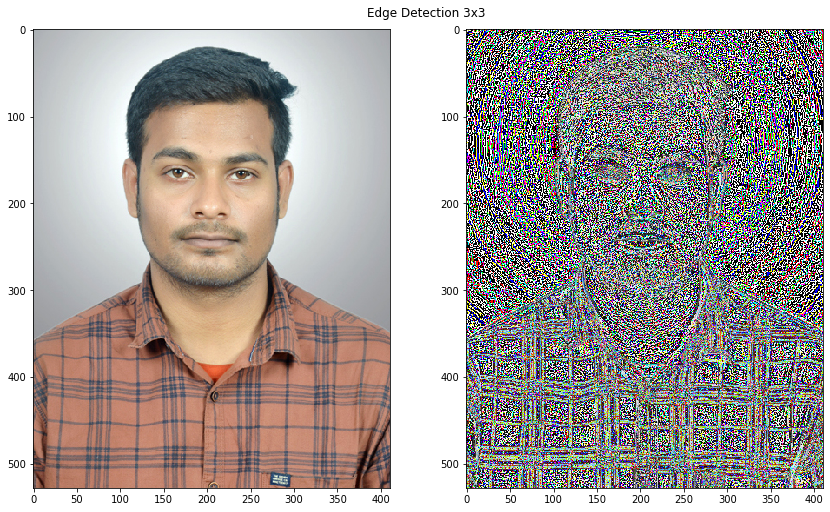

In [5]:
im_filtered = RGB_convolve(im_data, kernel)

plt.rcParams["figure.figsize"] = (12, 7)

fig, (axL, axR) = plt.subplots(ncols=2, constrained_layout=True)
fig.suptitle(kernel_name)
imL = axL.imshow(im_data, interpolation="none")  # remove interpolarationtion=...
imR = axR.imshow(im_filtered, interpolation="none")  # remove interpolaration
plt.show()

In [ ]:
#@title Original Code 
plt.style.use('dark_background')  # comment out for "light" theme
plt.rcParams["font.size"] = 12

plt.rcParams["figure.figsize"] = (12, 7)


def RGB_convolve(im1, kern):
    im2 = np.empty_like(im1)
    for dim in range(im1.shape[-1]):  # loop over rgb channels
        im2[:, :, dim] = sp.signal.convolve2d(im_data[:, :, dim],
                                              kern,
                                              mode="same",
                                              boundary="symm")
    return im2


def RGB2RGBA(arr, fill_value=1):
    """Add an alpha channel to an RGB array"""
    if arr.shape[-1] >= 4:
        return arr
    arr2 = np.full(shape=(*arr.shape[:-1], 4),
                   fill_value=fill_value,
                   dtype=arr.dtype)
    arr2[:, :, :-1] = arr/255.
    return arr2


# FNAME = "blurryA.png"
FNAME = "/content/drive/MyDrive/Colab Notebooks/DSC_0236.jpg"

T = 10  # seconds
FPS = 30
FTOTAL = T*FPS  # total number of frames

KERNELS = {"Edge Detection 3x3": np.array([[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]]),
           "Sharpen 3x3": np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])}

kernel_name = "Sharpen 3x3"
# kernel_name = "Edge Detection 3x3"
kernel = KERNELS[kernel_name]

im_data = RGB2RGBA(plt.imread(FNAME).astype(np.float))

im_filtered = RGB_convolve(im_data, kernel)
im_filtered[:, :, -1] = 1

im_display = np.copy(im_data)

# im_filtered[:,:,:-1] -= np.min(np.sum(im_filtered[:,:,:-1], axis = 2))

# Normalise to white
# im_filtered[:,:,:-1] -= np.min(im_filtered[:,:,:-1])
# im_filtered[:,:,:-1] /= 1/3 * np.max(np.sum(im_filtered[:,:,:-1], axis = 2))

# Normalise to individual RGB

# im_filtered[:,:,:-1] -= np.min(im_filtered[:,:,:-1])
# im_filtered[:,:,:-1] /= np.max(im_filtered[:,:,:-1])

fig, (axL, axR) = plt.subplots(ncols=2, constrained_layout=True)
fig.suptitle(kernel_name)
imL = axL.imshow(im_data, interpolation="none")  # remove interpolation=...
imR = axR.imshow(im_filtered, interpolation="none")  # remove interpolation=...
axR.set_xlim(axL.get_xlim()), axR.set_ylim(axL.get_ylim())
axL.axis('off'), axR.axis('off')
imR.set_clim([0, 1])

indices = list(it.product(
    range(im_filtered.shape[0]), range(im_filtered.shape[1])))

Ninc = np.int(len(indices) / (FTOTAL))  # increment


def init_plot():
    # imR.set_data(im_data)
    return (imR,)


def update_plot(frame):
    for i in range(frame, frame + Ninc):
        if i >= len(indices):
            break
        idx_x, idx_y = indices[i]
        im_display[idx_x, idx_y, :] = im_filtered[idx_x, idx_y, :]

    imR.set_data(im_display)
    return (imR,)


if __name__ == "__main__":

    ani = FuncAnimation(fig, func=update_plot, init_func=init_plot, interval=1000/FPS,
                        frames=range(0, len(indices), Ninc), repeat=False, blit=True)
    plt.show()
